In [9]:
# 수치미분
import numpy as np
from funcs.twoL import TwoLayerNet

In [11]:
net1 = TwoLayerNet(3, 3, 3)
net_m = TwoLayerNet(784, 50, 10)

net_m.predict(np.arange(784))

array([0.10214421, 0.09676725, 0.09561593, 0.1004164 , 0.10221298,
       0.09436942, 0.0923663 , 0.10046445, 0.10265828, 0.11298477])

In [14]:
from data.mnist import load_mnist
from matplotlib import pyplot as plt

In [15]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

In [16]:
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("[{0}]train acc, test acc | ".format(i) + str(train_acc) + ", " + str(test_acc))

[0]train acc, test acc | 0.09915, 0.1009
[600]train acc, test acc | 0.7883833333333333, 0.7955
[1200]train acc, test acc | 0.8742333333333333, 0.8772
[1800]train acc, test acc | 0.8983166666666667, 0.9009
[2400]train acc, test acc | 0.90715, 0.9108
[3000]train acc, test acc | 0.9143666666666667, 0.9162
[3600]train acc, test acc | 0.9192166666666667, 0.9212
[4200]train acc, test acc | 0.9237166666666666, 0.9265
[4800]train acc, test acc | 0.9270333333333334, 0.9286
[5400]train acc, test acc | 0.9302833333333334, 0.9322
[6000]train acc, test acc | 0.9333833333333333, 0.9354
[6600]train acc, test acc | 0.9355166666666667, 0.9362
[7200]train acc, test acc | 0.9377166666666666, 0.9369
[7800]train acc, test acc | 0.9401333333333334, 0.9408
[8400]train acc, test acc | 0.9419166666666666, 0.9405
[9000]train acc, test acc | 0.9442666666666667, 0.9425
[9600]train acc, test acc | 0.9453333333333334, 0.9444


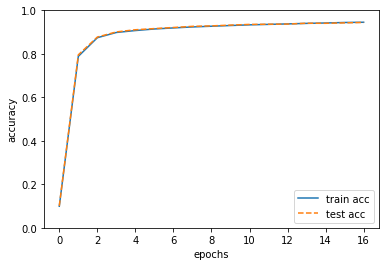

In [17]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [20]:
x = np.arange(12).reshape(3,2,2)
print(x)

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]


In [24]:
print(x.sum(axis=2))

[[ 1  5]
 [ 9 13]
 [17 21]]


In [5]:
# 역전파

from funcs.twoL import TwoLayerNet
from data.mnist import load_mnist
import numpy as np
from matplotlib import pyplot as plt

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

train_loss_list = []
train_acc_list = []
test_acc_list = []

In [9]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("[{0}]train acc, test acc | ".format(i) + str(train_acc) + ", " + str(test_acc))

[0]train acc, test acc | 0.13098333333333334, 0.1333
[600]train acc, test acc | 0.9072833333333333, 0.9104
[1200]train acc, test acc | 0.9269666666666667, 0.9302
[1800]train acc, test acc | 0.9351, 0.9355
[2400]train acc, test acc | 0.9460166666666666, 0.9459
[3000]train acc, test acc | 0.9516, 0.949
[3600]train acc, test acc | 0.95585, 0.9535
[4200]train acc, test acc | 0.9612666666666667, 0.9583
[4800]train acc, test acc | 0.96275, 0.9601
[5400]train acc, test acc | 0.9642, 0.96
[6000]train acc, test acc | 0.96955, 0.965
[6600]train acc, test acc | 0.9716, 0.9666
[7200]train acc, test acc | 0.9707833333333333, 0.966
[7800]train acc, test acc | 0.9759666666666666, 0.9703
[8400]train acc, test acc | 0.9763666666666667, 0.9695
[9000]train acc, test acc | 0.9779833333333333, 0.9706
[9600]train acc, test acc | 0.9795166666666667, 0.971


In [12]:
import pickle

with open('.\\result\\newModel.pkl', 'wb') as f:
    pickle.dump(network.params, f)